##Necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

##Load the data

In [5]:
df = pd.read_csv("/content/HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
# looking at null values
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [12]:
df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
df['ZN'].fillna(df['ZN'].median(), inplace=True)
df['INDUS'].fillna(df['INDUS'].median(), inplace=True)
df['CHAS'].fillna(df['CHAS'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)


In [13]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


##EDA

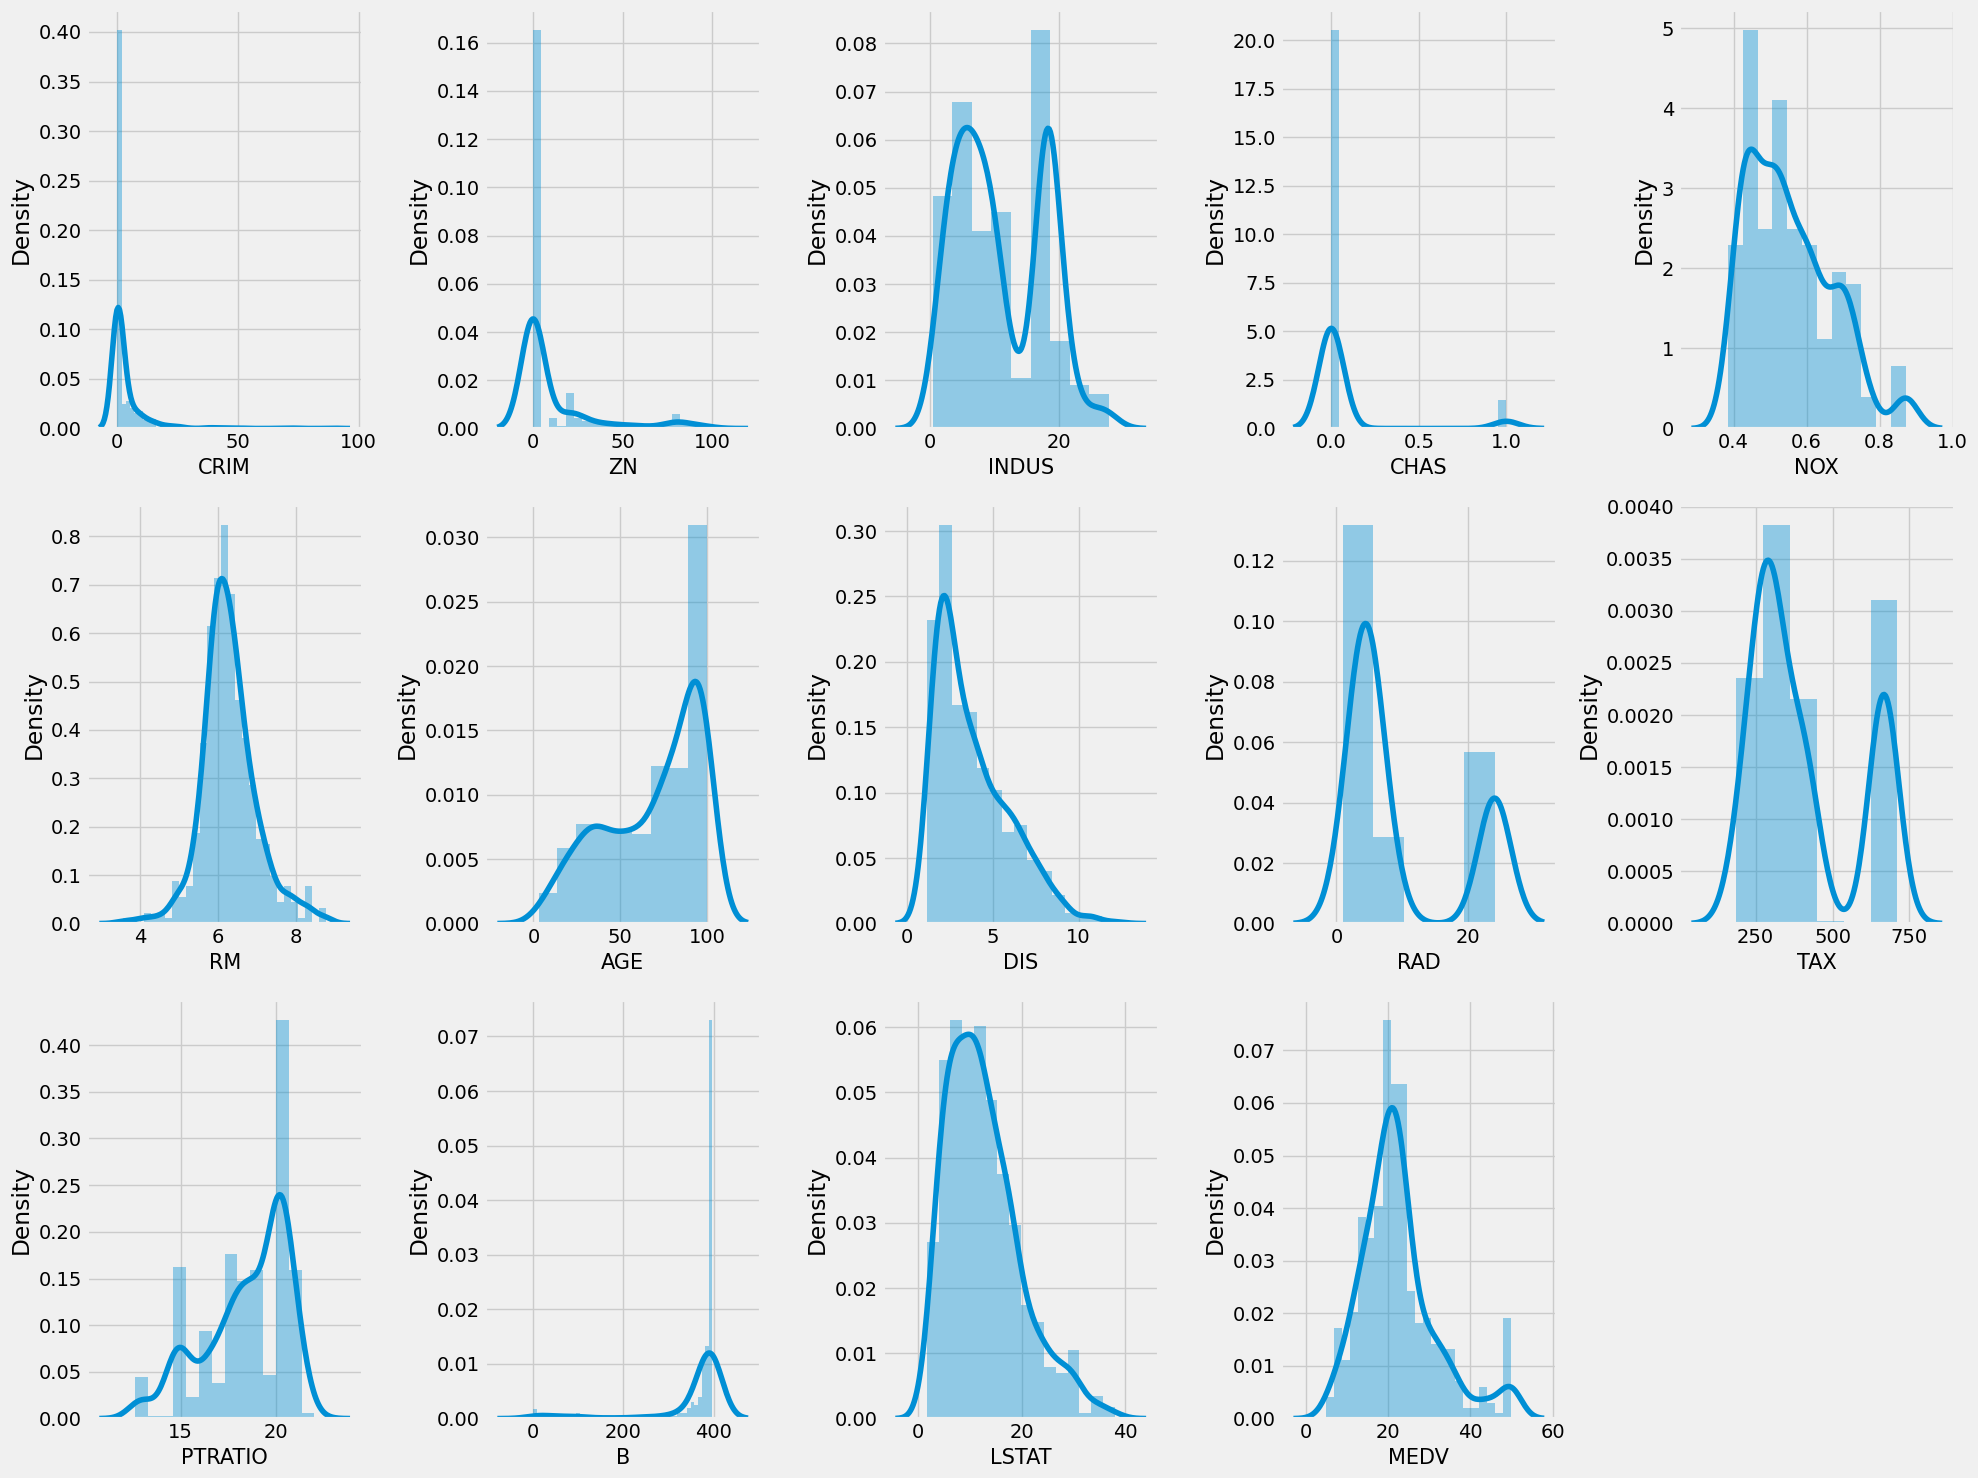

In [15]:
# Let's see how data is distributed for every column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

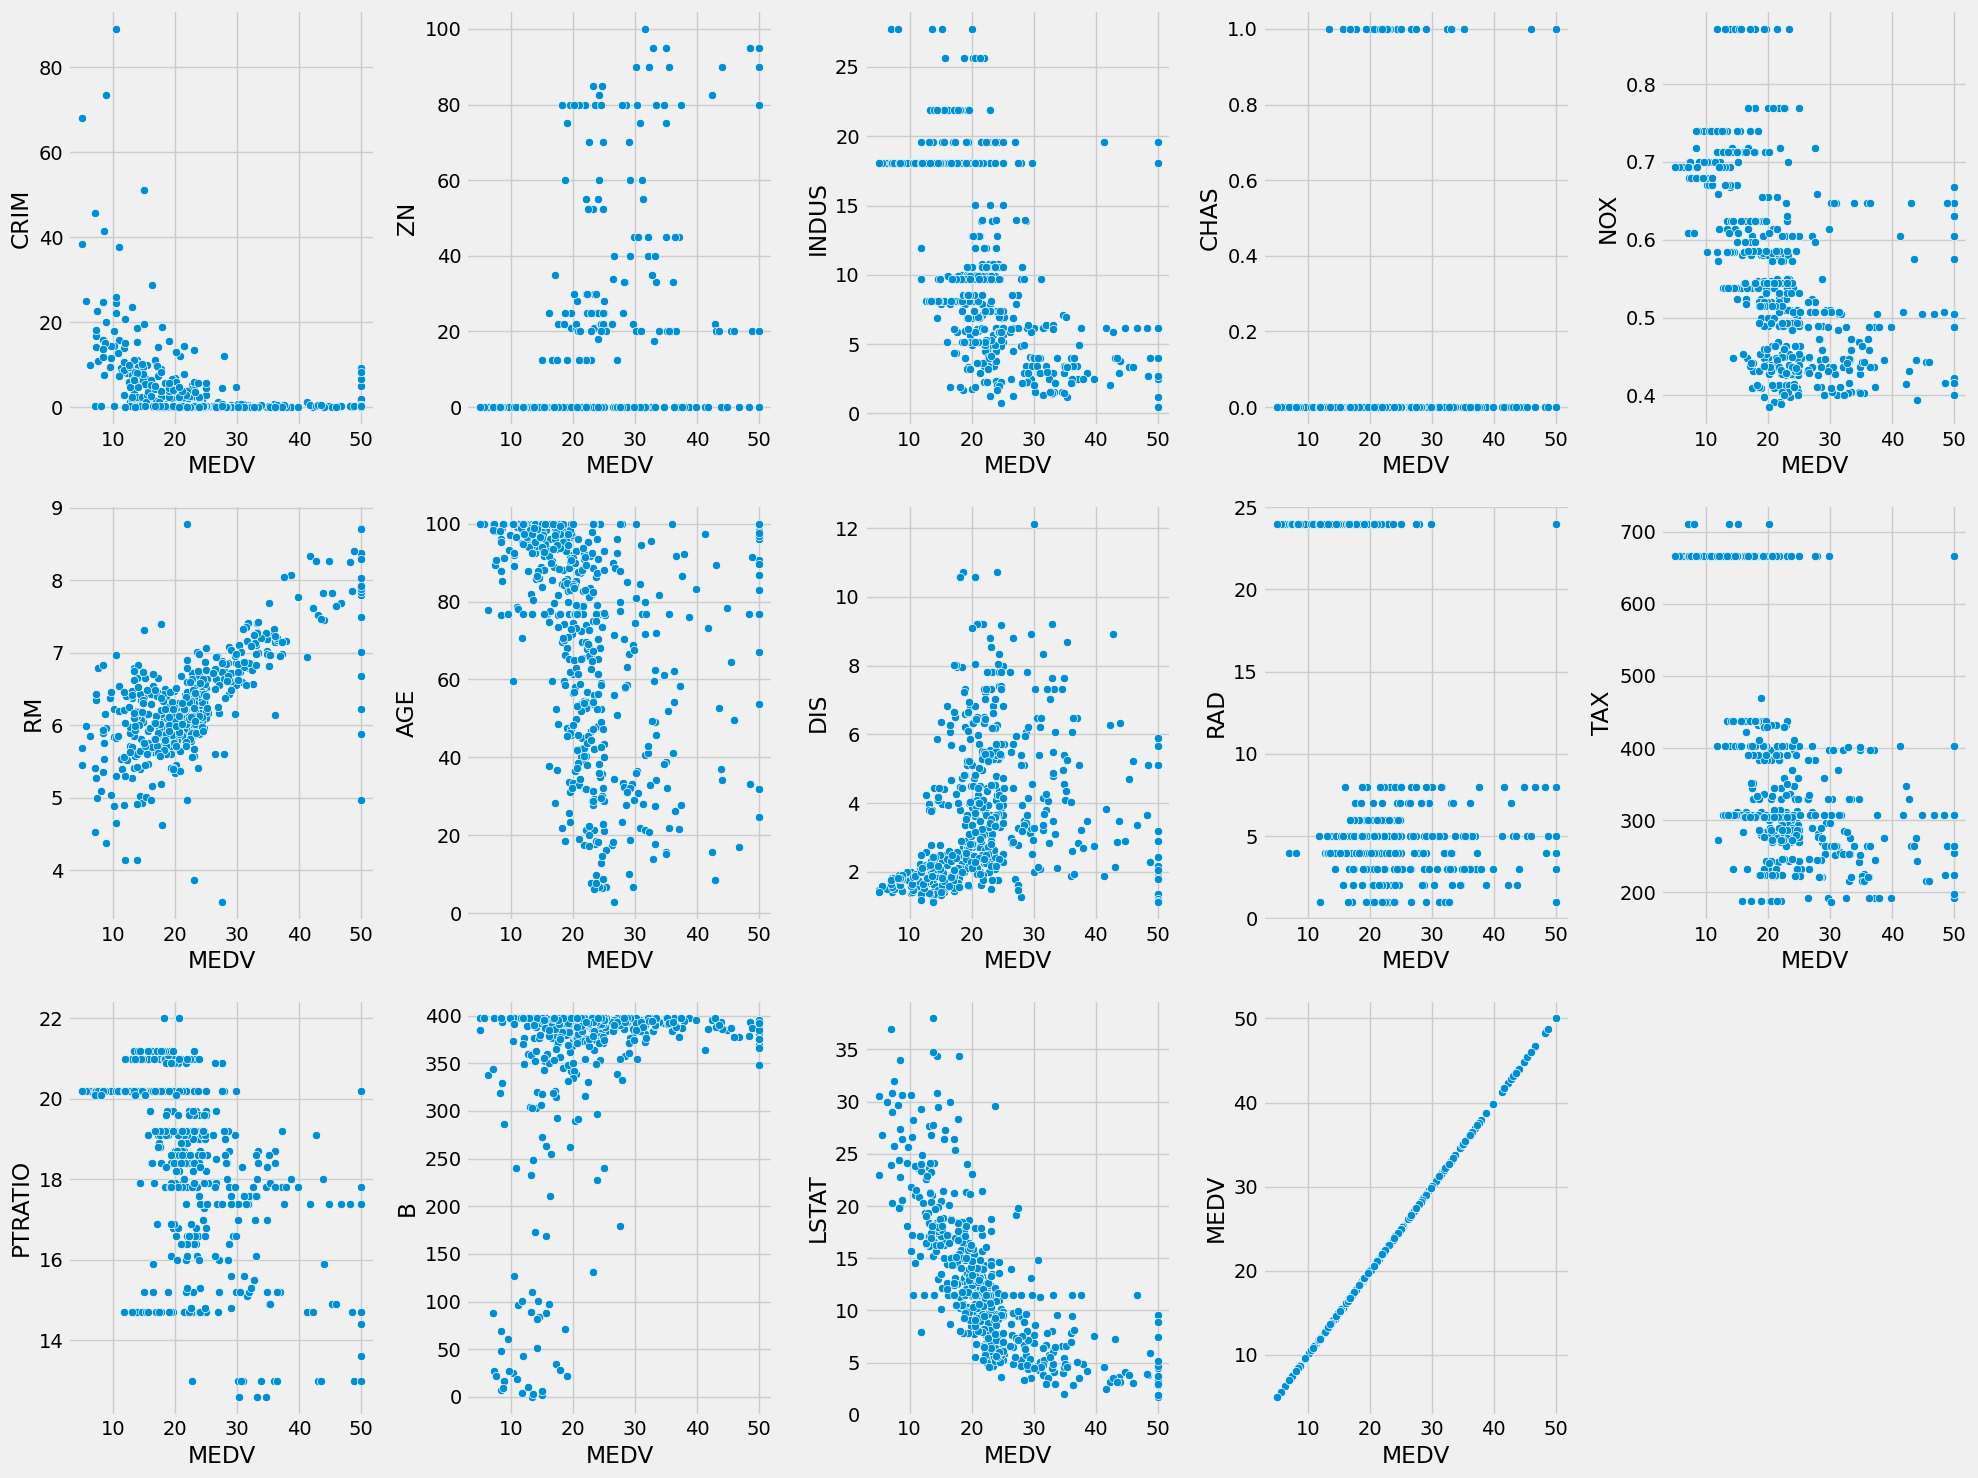

In [16]:
# Plotting `Price` with remaining columns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

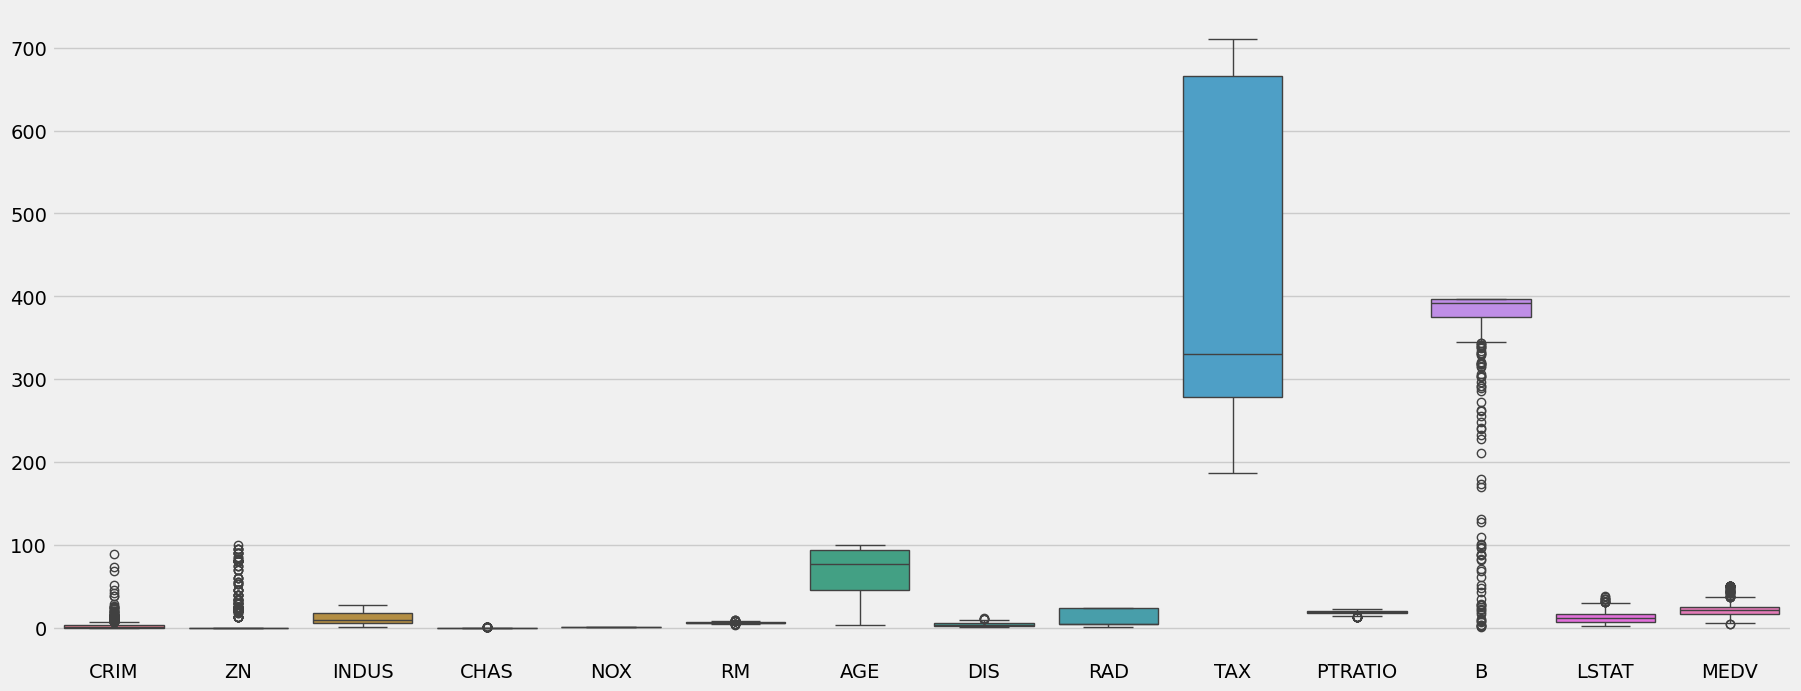

In [17]:
# looking for outliers using box plot
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [18]:
# creating features and label variable

X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[-0.40559156,  0.31436884, -1.30170603, ..., -1.45900038,
         0.44105193, -1.09619345],
       [-0.40314013, -0.46815955, -0.59105154, ..., -0.30309415,
         0.44105193, -0.50277932],
       [-0.40314247, -0.46815955, -0.59105154, ..., -0.30309415,
         0.39642699, -1.23170869],
       ...,
       [-0.3992335 , -0.46815955,  0.13453268, ...,  1.17646583,
         0.44105193, -1.00204601],
       [-0.39353063, -0.46815955,  0.13453268, ...,  1.17646583,
         0.4032249 , -0.88222201],
       [-0.40079265, -0.46815955,  0.13453268, ...,  1.17646583,
         0.44105193, -0.68251533]])

In [21]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.695853,CRIM
1,2.115316,ZN
2,3.601473,INDUS
3,1.066547,CHAS
4,4.215560,NOX
5,1.867625,RM
6,2.748850,AGE
7,3.746430,DIS
8,7.344979,RAD
9,8.870381,TAX


In [22]:
# dropping 'TAX' column from data

X.drop(columns = ['TAX'], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,21.0,391.99,11.43
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


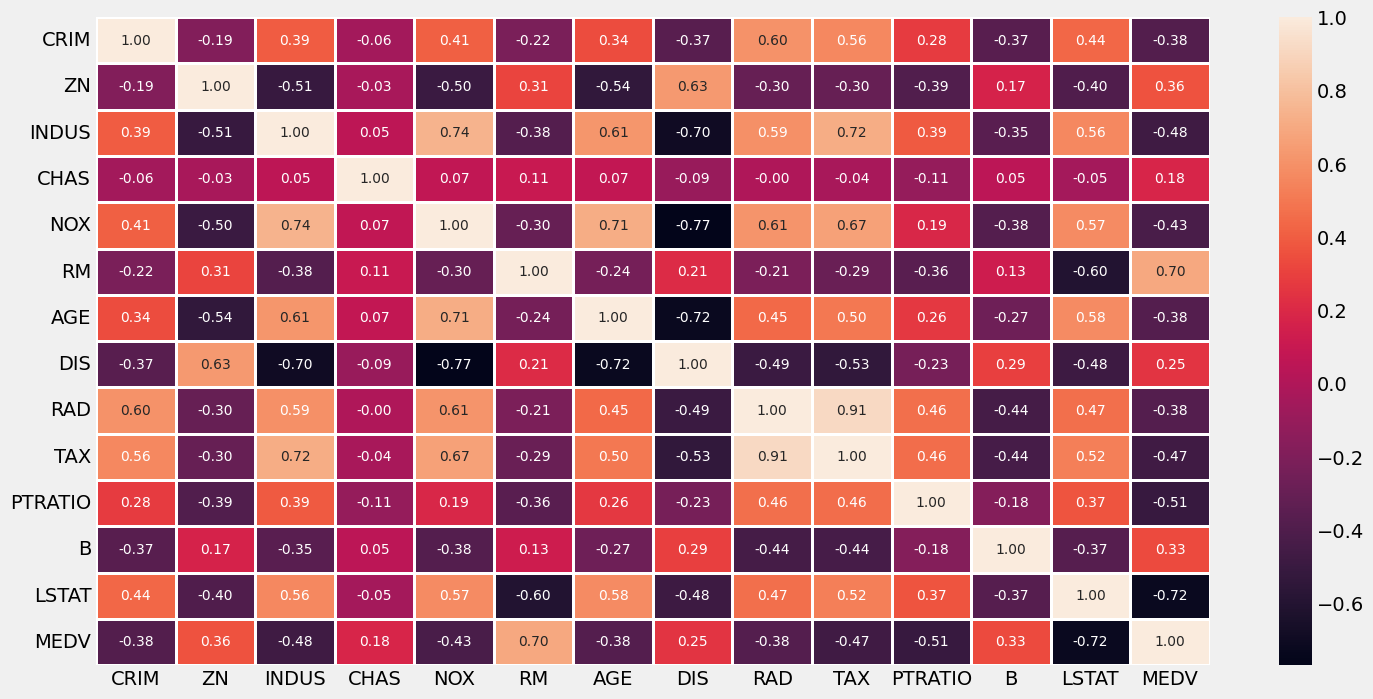

In [23]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [27]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'MEDV ~ RAD', data = df).fit()
lm = smf.ols(formula = 'MEDV ~ TAX', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           5.64e-29
Time:                        06:52:10   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# removing "RAD" column
df.drop(columns = 'RAD', axis = 1, inplace = True)

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,11.43,36.2


##Traing and Testing

In [30]:
# splitting data into training asnd test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

##Model fitting

In [31]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# prediction of model
y_pred = lr.predict(X_test)

In [33]:
# training accuracy of model
lr.score(X_train, y_train)

0.7588666072663288

In [34]:
# test accuracy of model
lr.score(X_test, y_test)

0.6557113177471509

In [38]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [39]:
print(adj_r2(X_train, y_train, lr))

0.7496468010735708


In [40]:
print(adj_r2(X_test, y_test, lr))

0.6232783259407231


Model r2 score is less on the test data so there is chance of overfitting, Check this using regularization.

##Lasso Regression

In [43]:
from sklearn.linear_model import Lasso, LassoCV
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [44]:
# best alpha parameter
alpha = lasso_cv.alpha_
alpha

np.float64(0.006625161053640389)

In [45]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=np.float64(0.006625161053640389))

In [46]:
lasso.score(X_train, y_train)

0.7588436805457969

In [47]:
lasso.score(X_train, y_train)

0.7588436805457969

In [48]:
print(adj_r2(X_train, y_train, lasso))

0.7496229977431361


In [49]:
print(adj_r2(X_test, y_test, lasso))

0.6226531666092658


##Ridge Regression

In [51]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.20948434, 6.0585449 , 7.92587392, 6.63130329, 1.23044228,
       8.91999923, 7.93267959, 0.81407105, 6.77100202, 6.54266603,
       4.81188945, 8.17335618, 9.8730633 , 4.44945106, 2.09306935,
       2.4434876 , 8.37836895, 9.55962614, 6.0597261 , 9.33798749,
       9.5046517 , 0.60137055, 1.25507251, 8.59438248, 6.41634236,
       9.82332066, 3.84563402, 8.20859725, 7.82680136, 9.27797335,
       6.98369594, 3.82101769, 7.93517849, 1.9290604 , 7.86259971,
       8.60699259, 1.47830068, 7.89453837, 6.6838688 , 0.98216946,
       7.29571559, 5.61808353, 5.32775678, 5.63650846, 7.68095974,
       8.1469934 , 3.81146248, 0.02631485, 4.26443438, 8.77426025]),
        cv=10)

In [52]:
# best alpha parameter
alpha = ridge_cv.alpha_
alpha

np.float64(9.87306329592591)

In [53]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=np.float64(9.87306329592591))

In [54]:
ridge.score(X_train, y_train)

0.75799583112783

In [55]:
ridge.score(X_test, y_test)

0.6508443870047826

In [56]:
print(adj_r2(X_train, y_train, ridge))

0.7487427305533059


In [57]:
print(adj_r2(X_test, y_test, ridge))

0.6179529162153781


##Elastic Net



In [59]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000)

In [60]:
# best alpha parameter
alpha = elastic_net_cv.alpha_
alpha

np.float64(0.018781989237528357)

In [61]:
# l1 ratio
elastic_net_cv.l1_ratio

0.5

In [62]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=np.float64(0.018781989237528357))

In [63]:
elastic_net.score(X_train, y_train)

0.7585739409240214

In [64]:
elastic_net.score(X_test, y_test)

0.6531508499310237

In [65]:
print(adj_r2(X_train, y_train, elastic_net))

0.749342944547587


We still are getting the same r2 score. That means our Regression model has been well trained over the training data and there is no overfitting.